## Clean version of post_pro_landau_rel for D=2

We use it and then move the results to Notes_log.

In [15]:
#using DifferentialEquations
using Plots
using Statistics
using FFTW
FFTW.set_provider!("mkl")
#import Pkg; Pkg.add("FileIO")
using FileIO
using JLD2
using Base.Threads
using Distributions
using LaTeXStrings
using Printf
using LsqFit
using LinearAlgebra

In [2]:
include("aux_functions/aux_functions.jl")

plot_matrix

In [3]:
outputs = false # detailed output (no longer used)
average_outputs =false
full_outputs = true
animation = false # to run animations
phase_space_show = false #show phase space diagrams
phase_space_show = true
remote_server = false # if run in remote as a script avoid all plots 
save_plots = true # put true is you want so save your plots.
plots = true

true

We first introduce the name of the file with the data and retrieve the metadata.

In [4]:
#file_name = "Results/norel_norm_undamped_rel_t400_L4_N85_n2_J80_M16001_o5_Th3_alp2_ave.jld2"
#file_name = "Results/norel_norm_undamped_rel_t400_L4_N86_n2_J80_M16001_o5_Th3_alp2_ave.jld2"
#file_name = "Results/norel_norm_undamped_rel_t400_L39.738_N86_n2_J3522_M16001_o5_Th3_alp2_ave.jld2"
#file_name = "Results/norel_norm_damped_rel_t40_L7.455_N85_n15_J930_M16001_o4_Th3_alp2_ave.jld2"
file_name = "Results/weibel_Box_1.0x1.0_J_50x100_Ax_25_Th3_alp8tf_1_N7_M11_o5_B0_0_full.jld2"

"Results/weibel_Box_1.0x1.0_J_50x100_Ax_25_Th3_alp8tf_1_N7_M11_o5_B0_0_full.jld2"

In [20]:
data, run_name, par_grid, par_evolv, par_f, n0, xs, t_series = retrieve_meta_data_D(file_name)
@show run_name
@show par_grid
@show par_evolv
@show par_f
@show (N, J, Box_x, order) = par_grid
@show (t_i, t_f, M, M_g, dt) = par_evolv
#@show (θ, nm, k) = par_f

dT = dt*(M-1)/(M_g-1)


#freqs_space = L*rfftfreq(J, 1/dx)

M_last = M_g  # number of last data point saved. Otherwise use M_g
#freqs_time = fftshift(rfftfreq(M_last, 1/dT))
#freqs_time = rfftfreq(M_last, 1/dT)*2*π;

dx = differentials(Box_x,J)
x_p = [dx[1]*(i-1) for i in 1:J[1]] ;
y_p = [dx[2]*(i-1) for i in 1:J[2]] ;

run_name = "weibel_Box_1.0x1.0_J_50x100_Ax_25_Th3_alp8tf_1_N7_M11_o5_B0_0"
par_grid = (10000000, (50, 100), (0.0, 1.0, 0.0, 1.0), 5)
par_evolv = (0.0, 0.1, 11, 11, 0.01)
par_f = (0.001, 0.025, 25)
(N, J, Box_x, order) = par_grid = (10000000, (50, 100), (0.0, 1.0, 0.0, 1.0), 5)
(t_i, t_f, M, M_g, dt) = par_evolv = (0.0, 0.1, 11, 11, 0.01)


In [6]:
if false
f_test(t) = sin(2*π*5*t)
F_test = rfft(f_test.(t_series))
freqs_time_test = (rfftfreq(M_g, 1/dT));
Plots.scatter(freqs_time_test, (abs.(F_test)))
end

We can have data written out in full o in averaged format: In each case we use different functions. Data written in full has a `"full.jld2"` at the end, otherwise a `"ave.jld2"` is used.

For the full case we use:

```
v = retrieve_data_D(data, par_grid, par_evolv);
```
```
Energy_K, Energy_E, EField_T, p_T, Q_T, S_T, T = get_averages_threads_D(v,par_grid,par_evolv, par_f);
```

For the averaged case we use:

```
M_last = 1601 # number of iterations already completed. 

n_t, S_t, Efield_t, averages = retrieve_average_data_D(data, par_grid, par_evolv;M_last=M_last);

Energy_E,  Energy_K, EField_T, p_T, Q_T, S_T, T = averages;
```



In [21]:
#M_last = 11
if average_outputs
n_t, S_t, Efield_t, averages = retrieve_average_data_D(data, par_grid, par_evolv;M_last=M_last);

Energy_E,  Energy_K, EField_T, p_T, Q_T, S_T, T = averages;

elseif full_outputs
    v = retrieve_data_D(data, par_grid, par_evolv; M_last=M_last);
end

40015000×11 Matrix{Float64}:
  0.116842     0.115719     0.114597    …   0.106738     0.105615
  0.654231     0.65459      0.654949        0.657461     0.65782
 -0.113057    -0.113057    -0.113057       -0.113057    -0.113057
  0.0361467    0.0361467    0.0361467       0.0361467    0.0361467
  0.381616     0.382524     0.383433        0.389792     0.390701
  0.6488       0.648184     0.647568    …   0.643258     0.642643
  0.0914014    0.0914014    0.0914014       0.0914014    0.0914014
 -0.0619464   -0.0619464   -0.0619464      -0.0619464   -0.0619464
  0.615867     0.61483      0.613792        0.60653      0.605493
  0.879525     0.879205     0.878885        0.876647     0.876327
  ⋮                                     ⋱                ⋮
  6.98562e-9   6.80998e-9   6.71034e-9      9.37037e-9   1.03022e-8
 -5.07137e-9  -7.17974e-9  -9.33909e-9     -2.52373e-8  -2.75119e-8
  0.0          0.0          0.0             0.0          0.0
  1.92012e-8   1.98006e-8   2.03102e-8      2.07619e-

Check constraints:

In [22]:
j = 11
par_grid = (N, Box_x, J, 5)
nf = zeros(J)
get_density_2D!(v[1:4N,j], nf, par_grid)

Ef = Array{Float64,3}(undef,(2,J...))
ρf = nf.-1.0/prod(J)
@show sum(ρf)
get_E!(Ef,ρf,Box_x);

sum(ρf) = -8.271378373891913e-16


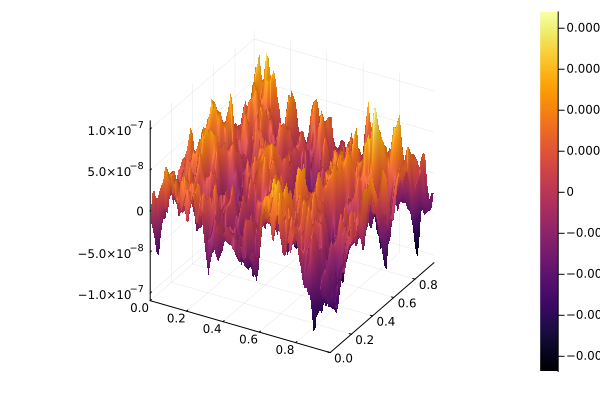

In [23]:

Fuj = view(v[:,j],4N+1:4N+3*prod(J))

Fj = reshape(Fuj,3,J...)

#F = view(u[4N+1:end],3,J...)
Ej = Fj[1:2,:,:]
Bj = Fj[3,:,:];

surface(y_p,x_p,Ej[2,:,:])
#surface(y_p,x_p,Bj[:,:])

#norm(Bj)

In [24]:
norm(Ef - Ej)/norm(Ej)

0.2635404963301943

In [ ]:

plot_averages(averages, t_series[1:M_last], N, run_name, save_plots)

In [ ]:
C_i = 0.060145630933730654 + 0.31190415932386045im

Plots.scatter(t_series[1:M_last],E_mode[1:M_last], markersize=1)
@. model_mode(x,p) = abs(real((p[1]+im*p[2])*exp(im*(p[3]+im*p[4])*x)))
N_i = 10
N_f = M_last
pm = [real.(C_i); imag.(C_i);1.1; 0.10]
#model_mode(2,pm)
fit_E_mode = curve_fit(model_mode, t_series[N_i:N_f], E_mode[N_i:N_f], pm);
plot!(t_series[N_i:N_f], model_mode(t_series[N_i:N_f],fit_E_mode.param))
#fit_E_mode.param
if save_plots
    png("Images/" * run_name * "_single_mode_fit.png")
end

In [ ]:
fit_E_mode.param

#### Energy fit 

In [ ]:
plot_energies(Energy_K, Energy_E, t_series[1:M_last], run_name, save_plots)

In [ ]:
@. model_e1(x,p) =  p[1] + p[2]*cos(p[3]*x + p[4])*exp(-p[5]*x) + p[6]*cos(p[7]*x + p[8])*exp(-p[9]*x)
@. model_e2(x,p) = p[1] + p[2]*(cos(p[3]*x + p[4])^2 - p[6])*exp(-p[5]*x)
@. model_e3(x,p) = p[1] + (p[2]*cos(p[3]*x + p[4])*exp(-p[5]*x) + p[6]*cos(p[7]*x + p[8])*exp(-p[9]*x))^2

pe_1 = [0.00001; 0.0001; 2; 0; 0.002; 0.00001; 2; 0; 0.0]
pe_2 = [0.0001; -0.0001; 1; 0; 0.000; 0.5]

#pe = [0.001; 0.001; 2.03; 2; 0.002; 0.001; 3.0; 0.0; 0.0]
#pe = [0.01; -0.01; 1; 0; 0.002; 0.0]
pe_3 = [0.00001; 0.001; 1.0; 2; 0.000; 0.001; 1.002; 0.0; 0.000]
#pe_3 = fit_e.param
fit_e, plt = energy_fit(t_series, Energy_E, model_e2, pe_2, 10, M_last, run_name, save_plots, yscale=:identity)
plt 

In [ ]:
fit_e.param

#### Temperature Fit

In [ ]:
N_i = 1
N_f = M_last
p_tl001 = [0.001; 0.001; 2.02; 0; 0.0; 0.; 2.0; 0; 0]
fit_T_1, plt = temperature_fit(t_series, T, p_tl001, N_i, N_f, run_name, save_plots)
plt

In [ ]:
#model_tl001(x,p) = p[1] + p[2]*cos(p[3]*x + p[4])*exp(-p[5]*x) + p[6]*cos(p[7]*x + p[8])*exp(-p[9]*x)
fit_T_1.param

In [ ]:
ΔT = T .- sum(T)/length(T)
T_F = rfft(ΔT)
Plots.scatter(freqs_time,abs.((T_F)), title = " Temperature Spectrum", label="abs.(T_F)",legend=:topleft
, xticks=1.9:0.05:2.3, xlim=(1.9,2.3)
)
#=
Plots.scatter(abs.((T_F)), title = "Spectrum", label="abs.(T_F)",legend=:topleft
    , xticks=100:1:200, xlim=(120,140)
    )
    =#

    if save_plots
        png("Images/" * run_name * "_temperature_spectrum.png")
    end

In [ ]:
plot(ΔT)

In [ ]:
N_i = 1
N_f = M_last
p_tl001 = [0.00; 0.001; 2.02; 0; 0.0; 0.; 2.0; 0; 0]
fit_ΔT_1, plt = temperature_fit(t_series, T, p_tl001, N_i, N_f, run_name, save_plots)
plt

In [ ]:
fit_ΔT_1.param

#### Density study

In [ ]:
plot(n_t[:,M_last])

In [ ]:
n_F = rfft(n_t[:,M_last].-1); # we take out the background
#n_F = rfft(n_t[:,1].-1); # we take out the background

In [ ]:
Plots.scatter(freqs_space,abs.((n_F)), title = "Density Spectrum", label="abs.(n_F)",legend=:topleft
    , xticks=0:0.2:6
    , xlim=(0,6)
    )
    #recall that it is shifted one position to the right, so the frequency is 20.

In [ ]:
3/2*0.1^2

In [ ]:
2.012904971545909/2

In [ ]:
2.0033087748744984/2

